# Bright Academy Student Analysis and Grade Predicition

#### Problem Definition :
BrightPath Academy has a problem identifing at risk students early enough, which hinders their ablity to provide personalized support to students on time.Although they have collected data on their students. This data includes various aspects of the students life that could be affecting their performance in class, like extracurricular activites, parental involvment academic performance, study habits and more.However they lack the insights about the data to help solve this problem

#### Hypothesis : 
1. Students with lower study hours  will have lower GPAS 
2. Students with low to none parental involvment will have lower GPS's on average 
3. Students with Higher Absences will have lower GPA's on average
4. Students engaging in tutuoring will have a higher average than those who are not 

### Features of data : 
- Student Information
- -  StudentID: A unique identifier assigned to each student (1001 to 3392).

- Demographic details
    - Age: The age of the students ranges from 15 to 18 years.
    - Gender: Gender of the students, where 0 represents Male and 1 represents Female.
    - Ethnicity: The ethnicity of the students, coded as follows:
        - 0: Caucasian
        - 1: African American
        - 2: Asian
        - 3: Other

- ParentalEducation: The education level of the parents, coded as follows:
    - 0: None
    - 1: High School
    - 2: Some College
    - 3: Bachelor's
    - 4: Higher Study

- Study Habits
    - StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
    - Absences: Number of absences during the school year, ranging from 0 to 30.
    - Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

- Parental Involvement
    - ParentalSupport: The level of parental support, coded as follows:
        - 0: None
        - 1: Low
        - 2: Moderate
        - 3: High
        - 4: Very High

- Extracurricular Activities
    - Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
        - Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
        - Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
        - Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates
Yes.

- Academic Performance
    - GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits,
parental involvement, and extracurricular activities.

- Target Variable: Grade Class
    - GradeClass: Classification of students' grades based on GPA:
        - 0: 'A' (GPA >= 3.5)
        - 1: 'B' (3.0 <= GPA < 3.5)
        - 2: 'C' (2.5 <= GPA < 3.0)
        - 3: 'D' (2.0 <= GPA < 2.5) 
        - 4: 'F' (GPA < 2.0)

In [1]:
# importing all the revelant tools we'll need throughout the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Importing the Data 

df = pd.read_csv('../data/Student_performance_data .csv') ## df stands for dataframe created using pandas
df.head(20) ## showing the first 10 rows in the data frame.  


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [2]:
## double checking that the gpa and grade class correlate 
def calculate_grade_class(gpa):
    if gpa >= 3.5:
        return 0  # 'A'
    elif 3.0 <= gpa < 3.5:
        return 1  # 'B'
    elif 2.5 <= gpa < 3.0:
        return 2  # 'C'
    elif 2.0 <= gpa < 2.5:
        return 3  # 'D'
    else:
        return 4  # 'F'

df['GradeClass'] = df['GPA'].apply(calculate_grade_class)
df['GradeClass'].head(20)

0     2
1     1
2     4
3     3
4     4
5     1
6     2
7     4
8     2
9     0
10    3
11    4
12    4
13    4
14    3
15    4
16    3
17    4
18    4
19    3
Name: GradeClass, dtype: int64

## Understanding the Data 
- We'll start by getting  basic information about the data usnig some methods prevelant in the pandas library. 


In [3]:
display(df.info())
df.drop(columns=['StudentID'],inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 280.4 KB


None

In [4]:
df.describe().T ## gettins some descriptive statistics about the data

,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000
Sports,2392.0,0.303512,0.459870,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
df.isna().sum() ## checking if any of the columns are null so we can think about how to tackle them further down in the notebook 

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [6]:
df_grouped = df.groupby('GradeClass').mean()

df_grouped['GradeClass'] = df_grouped.index

df_Zero = df[df['GradeClass'] == 0.0]
df_Zero.describe()

##  Something wrong with grade class. 

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.00000,77.000000,77.000000,77.000000,77.000000,77.0
mean,16.519481,0.532468,0.961039,1.623377,12.891884,1.597403,0.584416,2.818182,0.61039,0.441558,0.272727,0.142857,3.682370,0.0
std,1.107515,0.502217,1.018791,0.903778,5.056855,1.822807,0.496054,1.022475,0.49086,0.499829,0.448282,0.352222,0.165340,0.0
min,15.000000,0.000000,0.000000,0.000000,1.317843,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,3.503743,0.0
25%,16.000000,0.000000,0.000000,1.000000,9.285447,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,3.548460,0.0
50%,16.000000,1.000000,1.000000,2.000000,13.546079,1.000000,1.000000,3.000000,1.00000,0.000000,0.000000,0.000000,3.603508,0.0
75%,18.000000,1.000000,2.000000,2.000000,17.442121,3.000000,1.000000,4.000000,1.00000,1.000000,1.000000,0.000000,3.812757,0.0
max,18.000000,1.000000,3.000000,4.000000,19.885760,9.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000,4.000000,0.0


## Exploratory Data Analysis
- We'll be explore the date in the following ways 
    - univariate analysis ( exploring 1 variable at a time )
    - bivariate analysis ( exploring 2 variables at a time )
    - using plots to visualize relationships between variables to find some sort of patterns before modelling


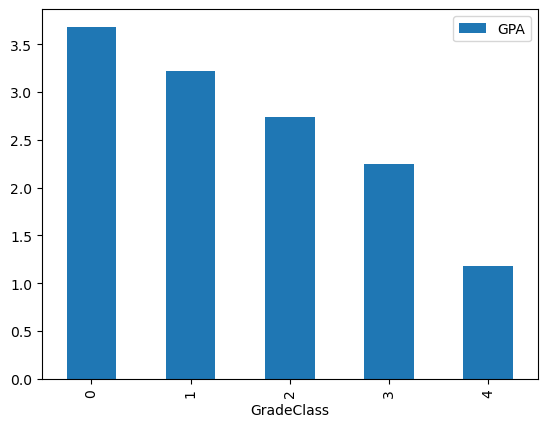

In [7]:
## Start EDA FROM HERE 
## eda should answer all the hypthoses questions by creating graphs or using comparisons between avereags, sums, counts etc. 
df_grouped = df.groupby('GradeClass').mean()

df_grouped['GradeClass'] = df_grouped.index

df_Zero = df[df['GradeClass'] == 0.0]
df_grouped.plot.bar(x='GradeClass',y='GPA')

numerical = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
cat_cols = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']




Text(0.5, 1.0, ' Number of students at each Age group')

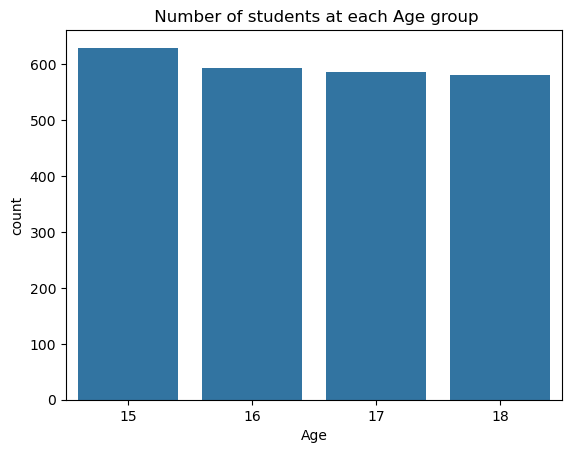

In [8]:
sns.countplot(data=df,x='Age')
plt.title(' Number of students at each Age group')

In [9]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


Text(0.5, 1.0, 'Box and Whisker plot of Parental Support ')

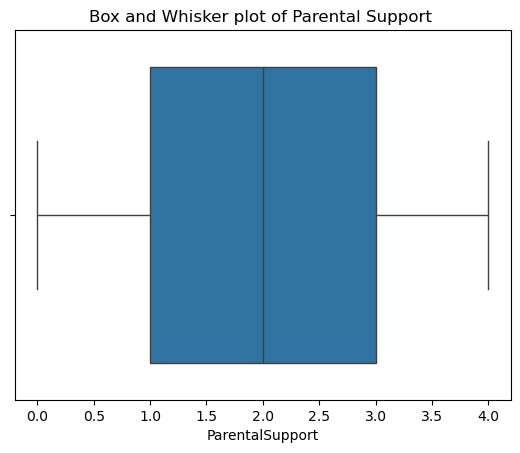

In [10]:
sns.boxplot(data=df,x='ParentalSupport')
plt.title('Box and Whisker plot of Parental Support ')

Text(0, 0.5, 'Number of occurences')

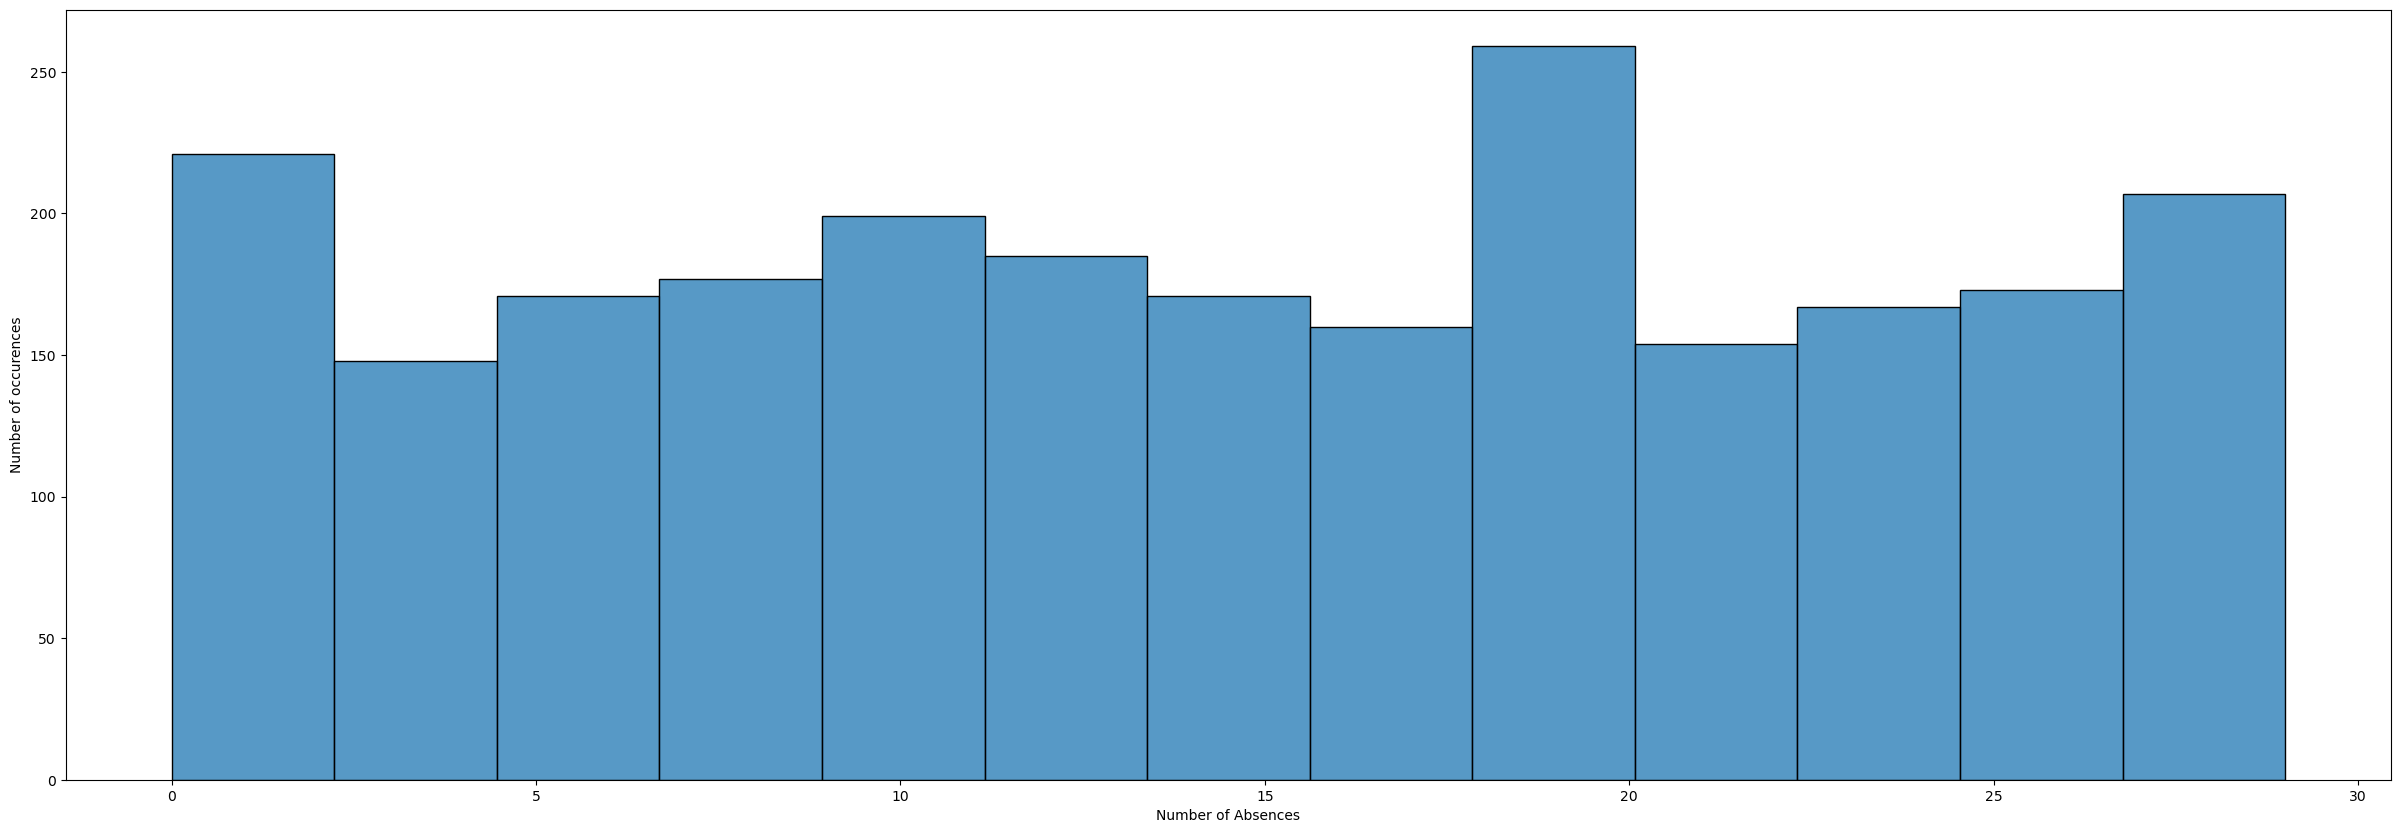

In [11]:

fig,ax = plt.subplots(figsize =(30,10))
ax = sns.histplot(data=df,x='Absences')
plt.title
ax.set_xlabel('Number of Absences')
ax.set_ylabel('Number of occurences')


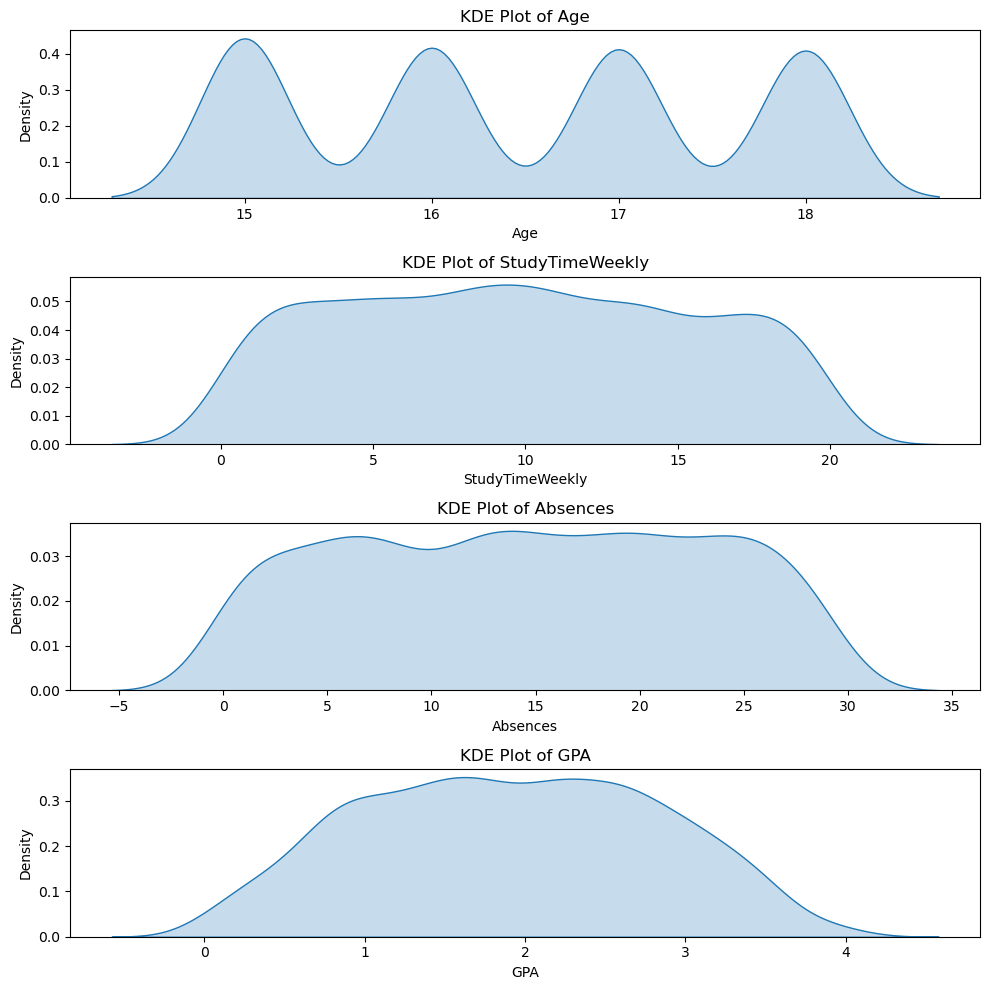

In [12]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(numerical):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f'KDE Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pie chart showing Gender Distribution')

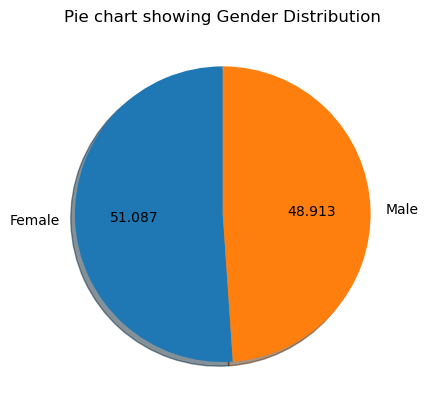

In [13]:
gender = df['Gender']
plt.pie(gender.value_counts(),startangle=90,autopct='%.3f',labels=['Female','Male'],shadow=True)
plt.title('Pie chart showing Gender Distribution')

In [14]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


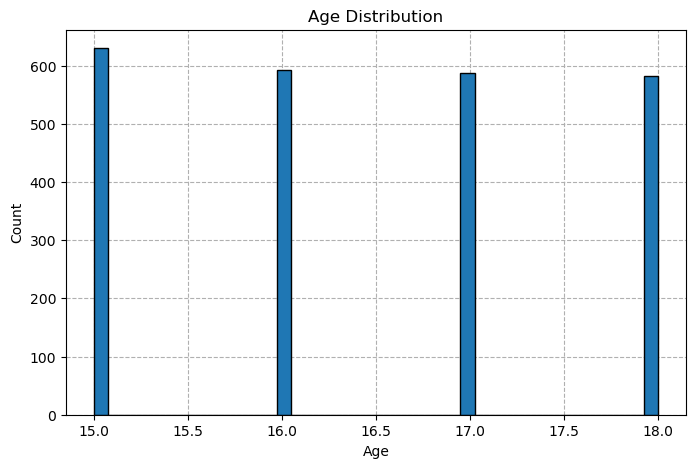

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["Age"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

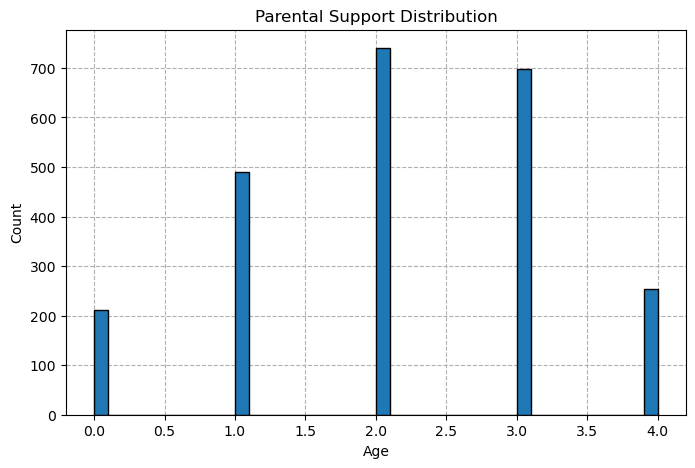

In [16]:
fig, ax = plt.subplots(figsize=(8, 5))
_ = plt.hist(df["ParentalSupport"], bins=40, edgecolor='black', linewidth=1)
plt.grid(linestyle="--", zorder=0)
plt.gca().set_axisbelow(True)  # Ensure grid lines are drawn below the bars
plt.title("Parental Support Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

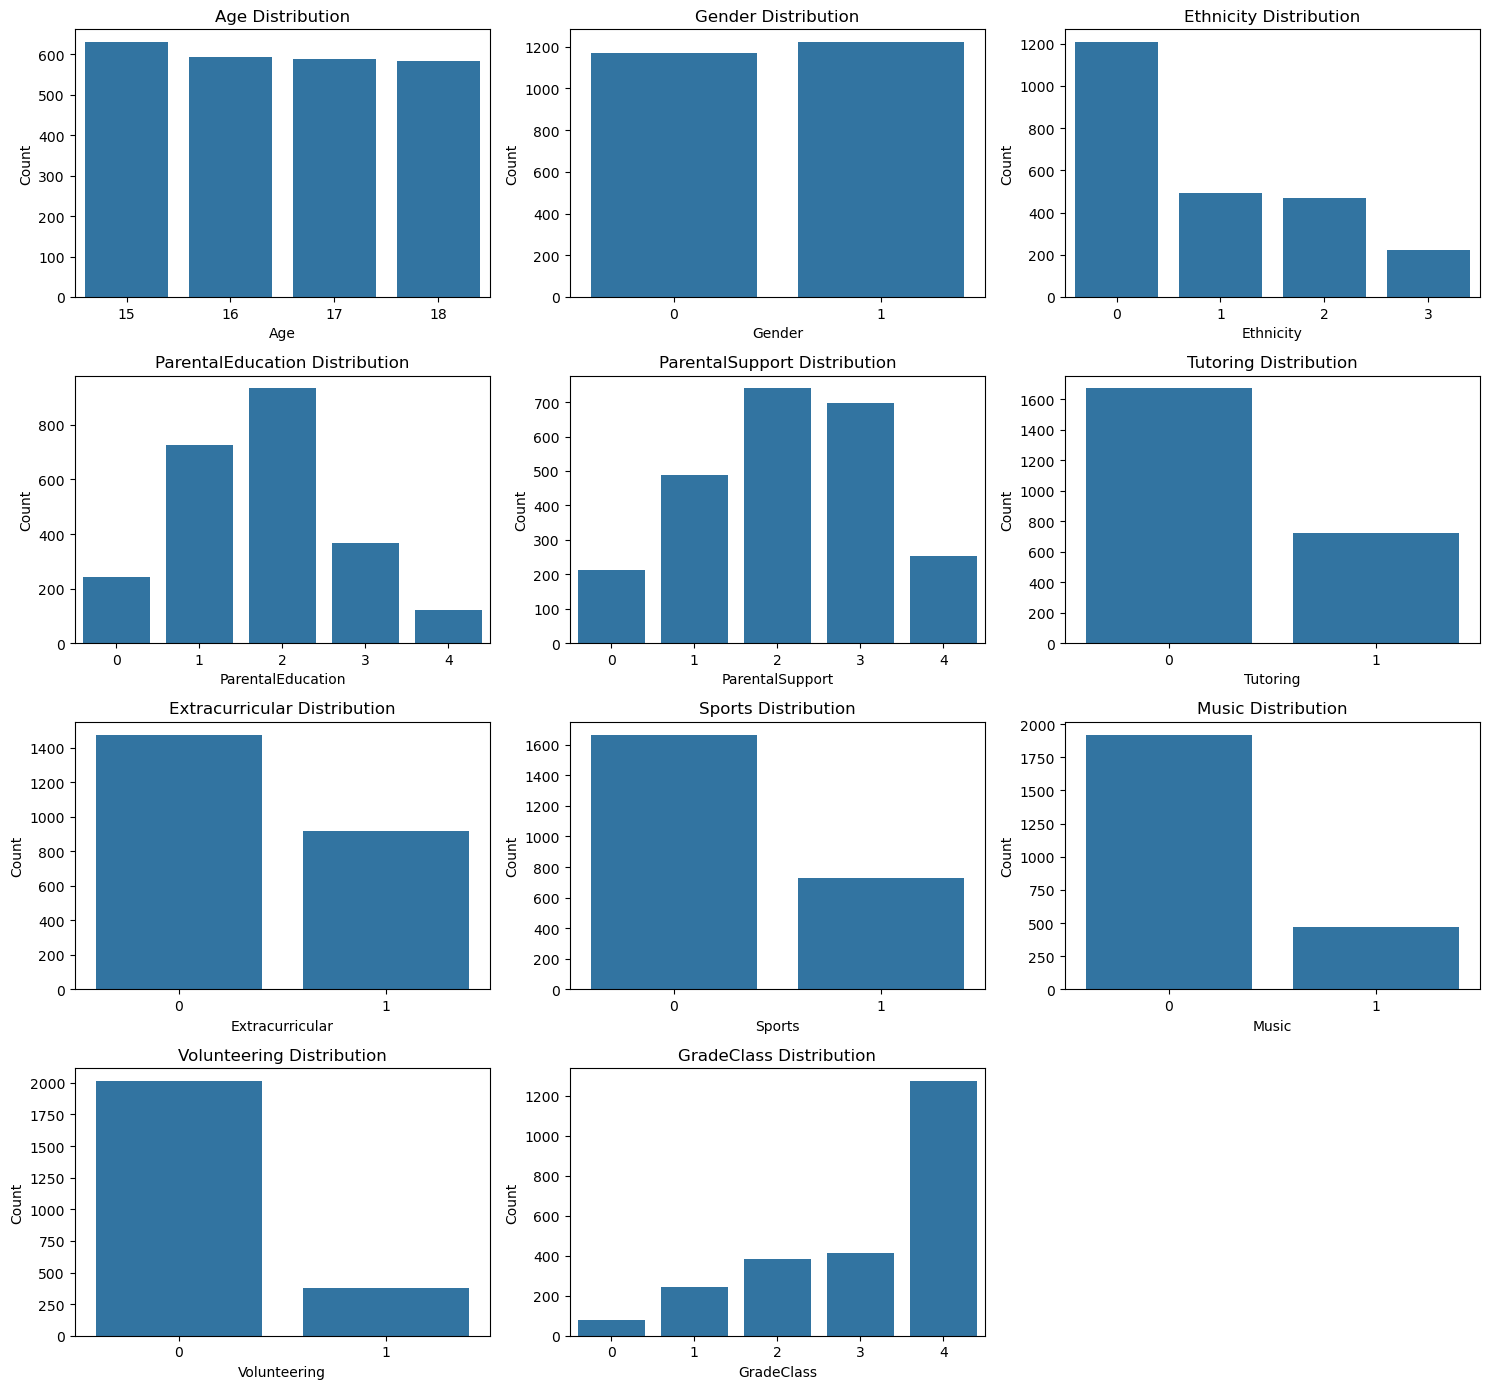

Age
15    26.34%
16    24.79%
17    24.54%
18    24.33%
Name: proportion, dtype: object
Gender
1    51.09%
0    48.91%
Name: proportion, dtype: object
Ethnicity
0    50.46%
1    20.61%
2    19.65%
3     9.28%
Name: proportion, dtype: object
ParentalEducation
2    39.05%
1    30.43%
3    15.34%
0    10.16%
4     5.02%
Name: proportion, dtype: object
ParentalSupport
2    30.94%
3    29.14%
1    20.44%
4    10.62%
0     8.86%
Name: proportion, dtype: object
Tutoring
0    69.86%
1    30.14%
Name: proportion, dtype: object
Extracurricular
0    61.66%
1    38.34%
Name: proportion, dtype: object
Sports
0    69.65%
1    30.35%
Name: proportion, dtype: object
Music
0    80.31%
1    19.69%
Name: proportion, dtype: object
Volunteering
0    84.28%
1    15.72%
Name: proportion, dtype: object
GradeClass
4    53.26%
3    17.22%
2     16.1%
1     10.2%
0     3.22%
Name: proportion, dtype: object


In [17]:
# Create subplots
plt.figure(figsize=(15, 14))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'{col} Distribution')
    plt.ylabel('Count')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

for col in cat_cols:
    # print(f"{round(df[col].value_counts(normalize=True)*100, 2)}%")
    print(
        (df[col].value_counts(normalize=True) * 100).round(2).astype(str) + '%'
    )

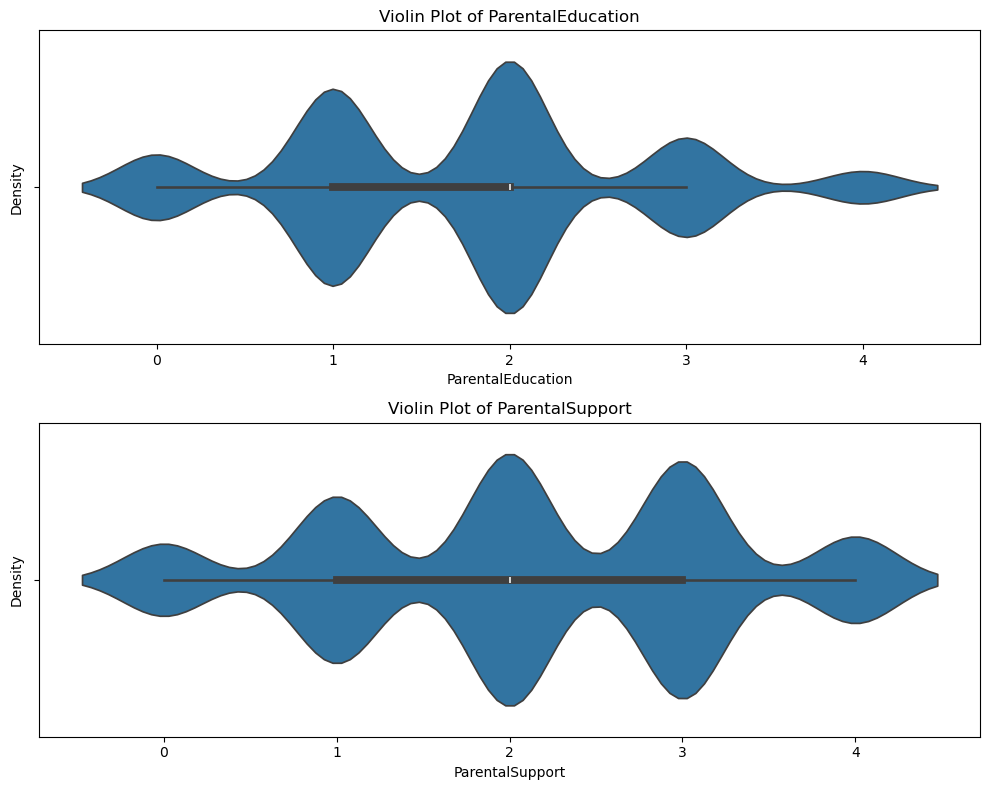

In [18]:
violin_cols = ['ParentalEducation', 'ParentalSupport']

plt.figure(figsize=(10, 8))

for i, col in enumerate(violin_cols):
    plt.subplot(len(violin_cols), 1, i + 1)
    sns.violinplot(data=df, x=col)
    plt.title(f'Violin Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

## Bivariate Analysis

In [19]:
df.head(20) ## Call this multiple times to see the data we can remove duplicate instances after revision.

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
5,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1
6,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2
7,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4
8,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2
9,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0


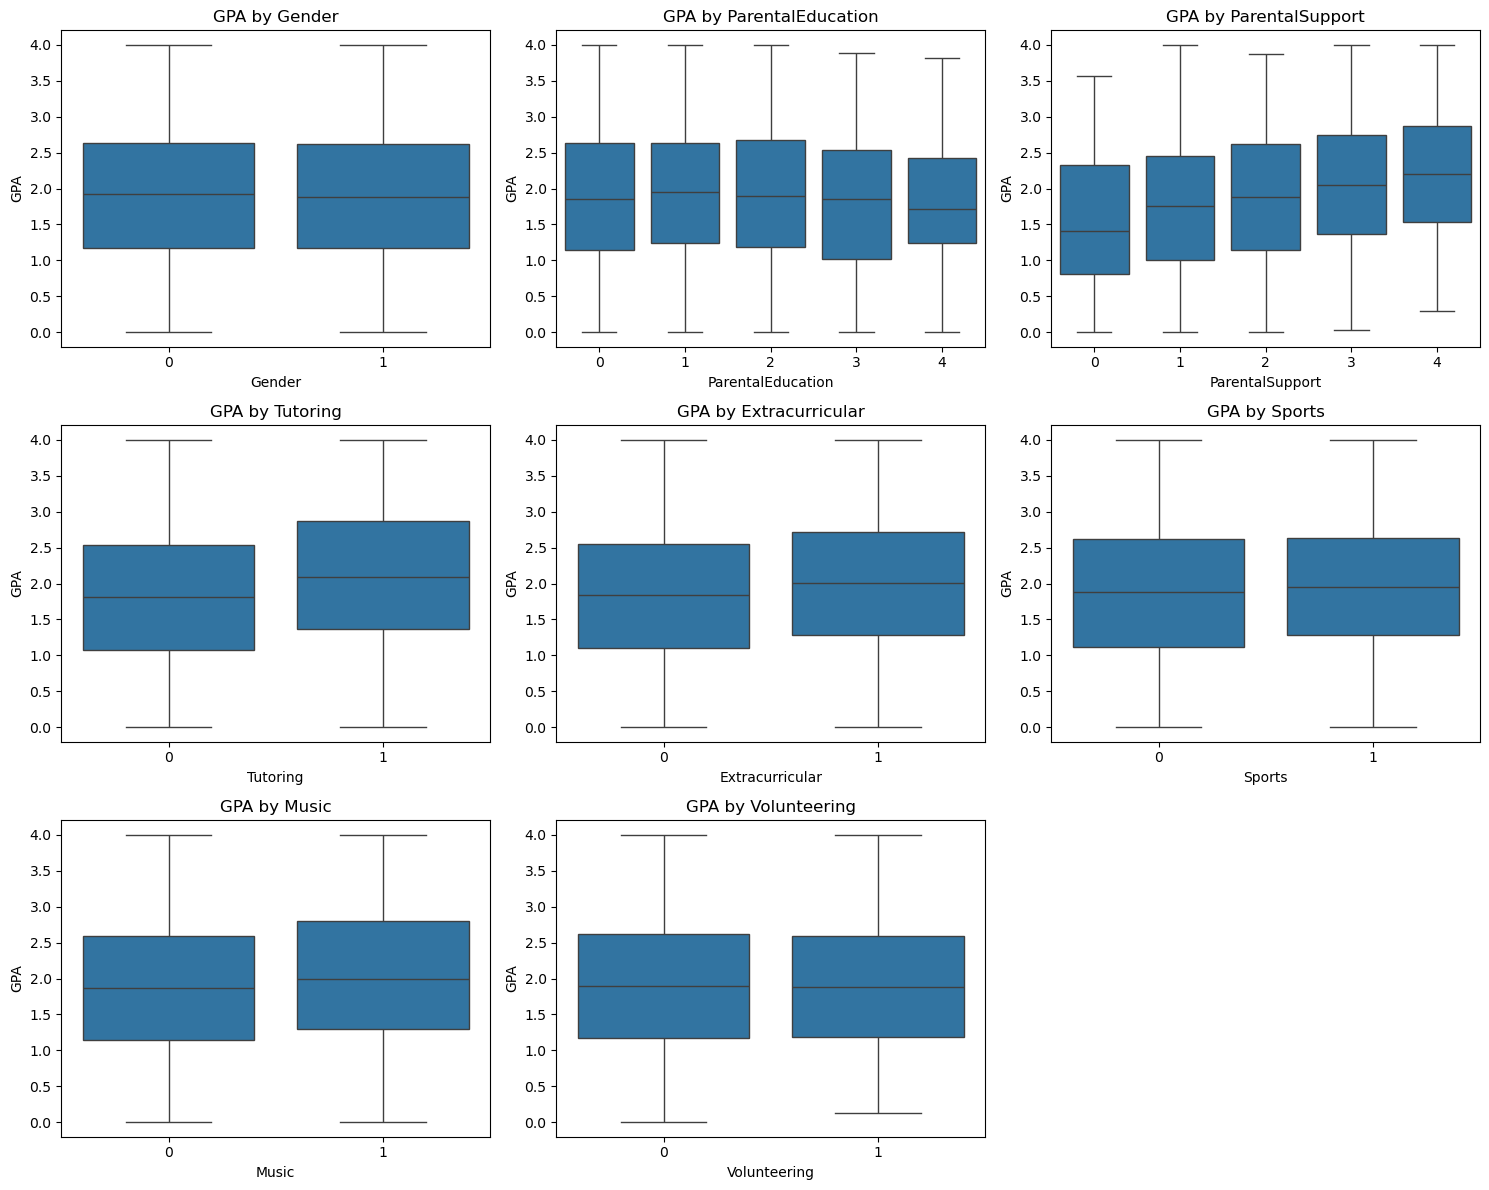

Parental eudaction GPA means
ParentalEducation
0    1.893045
1    1.944022
2    1.929881
3    1.809082
4    1.815812
Name: GPA, dtype: float64


In [20]:
categorical_cols = ['Gender', 'ParentalEducation', 'ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, y='GPA')
    plt.title(f'GPA by {col}')
    plt.xlabel(col)
    plt.ylabel('GPA')

plt.tight_layout()
plt.show()
print("Parental eudaction GPA means")
print( df.groupby('ParentalEducation')['GPA'].mean())


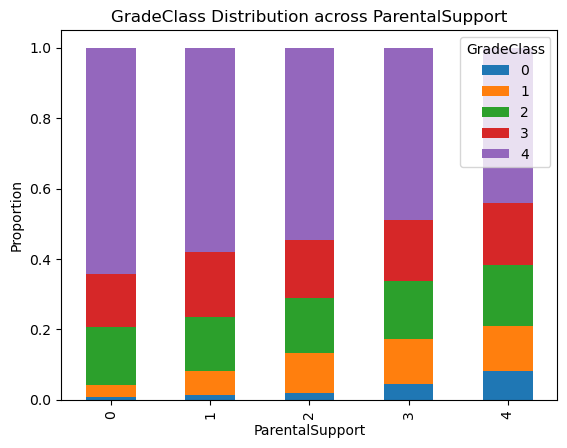

In [21]:
pd.crosstab(df['ParentalSupport'], df['GradeClass'], normalize='index').plot(kind='bar', stacked=True)
plt.title("GradeClass Distribution across ParentalSupport")
plt.ylabel("Proportion")
plt.show()


Text(0.5, 1.0, 'Bar char showing the relationship between parental education and tutoring')

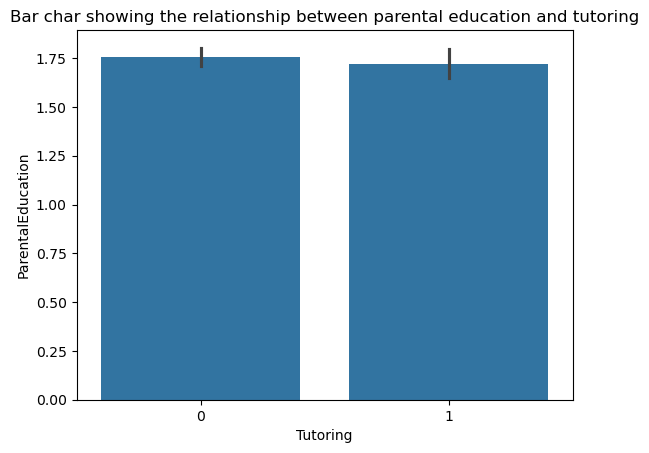

In [22]:
sns.barplot(data=df,x='Tutoring',y='ParentalEducation')
plt.title('Bar char showing the relationship between parental education and tutoring')

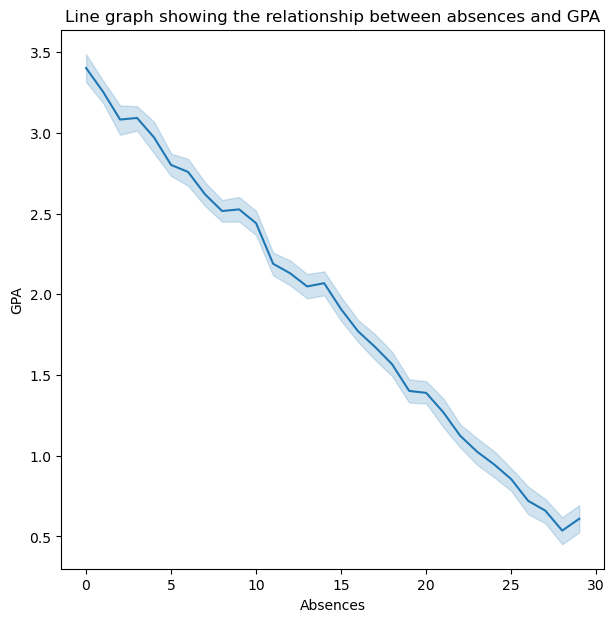

In [23]:
fig,ax = plt.subplots(figsize=(7,7))
ax = sns.lineplot(data=df,x='Absences',y='GPA')
plt.title('Line graph showing the relationship between absences and GPA')
plt.savefig('../SRC/assets/absences_gpa_graph.png')

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

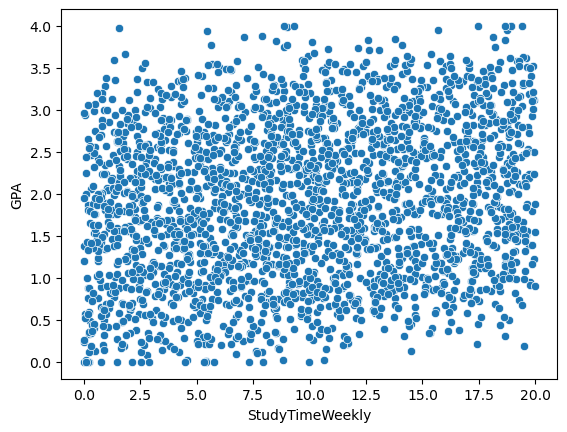

In [24]:
sns.scatterplot(data=df,x='StudyTimeWeekly',y='GPA')


Text(0.5, 1.0, 'Bar plot showing Absences against parental Support')

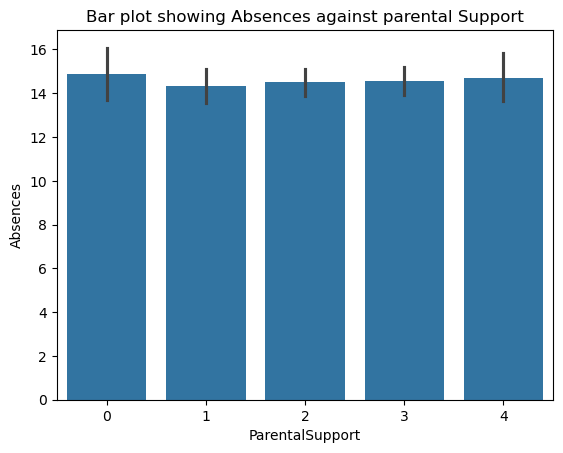

In [25]:
sns.barplot(data=df,x='ParentalSupport',y='Absences')
plt.title('Bar plot showing Absences against parental Support')

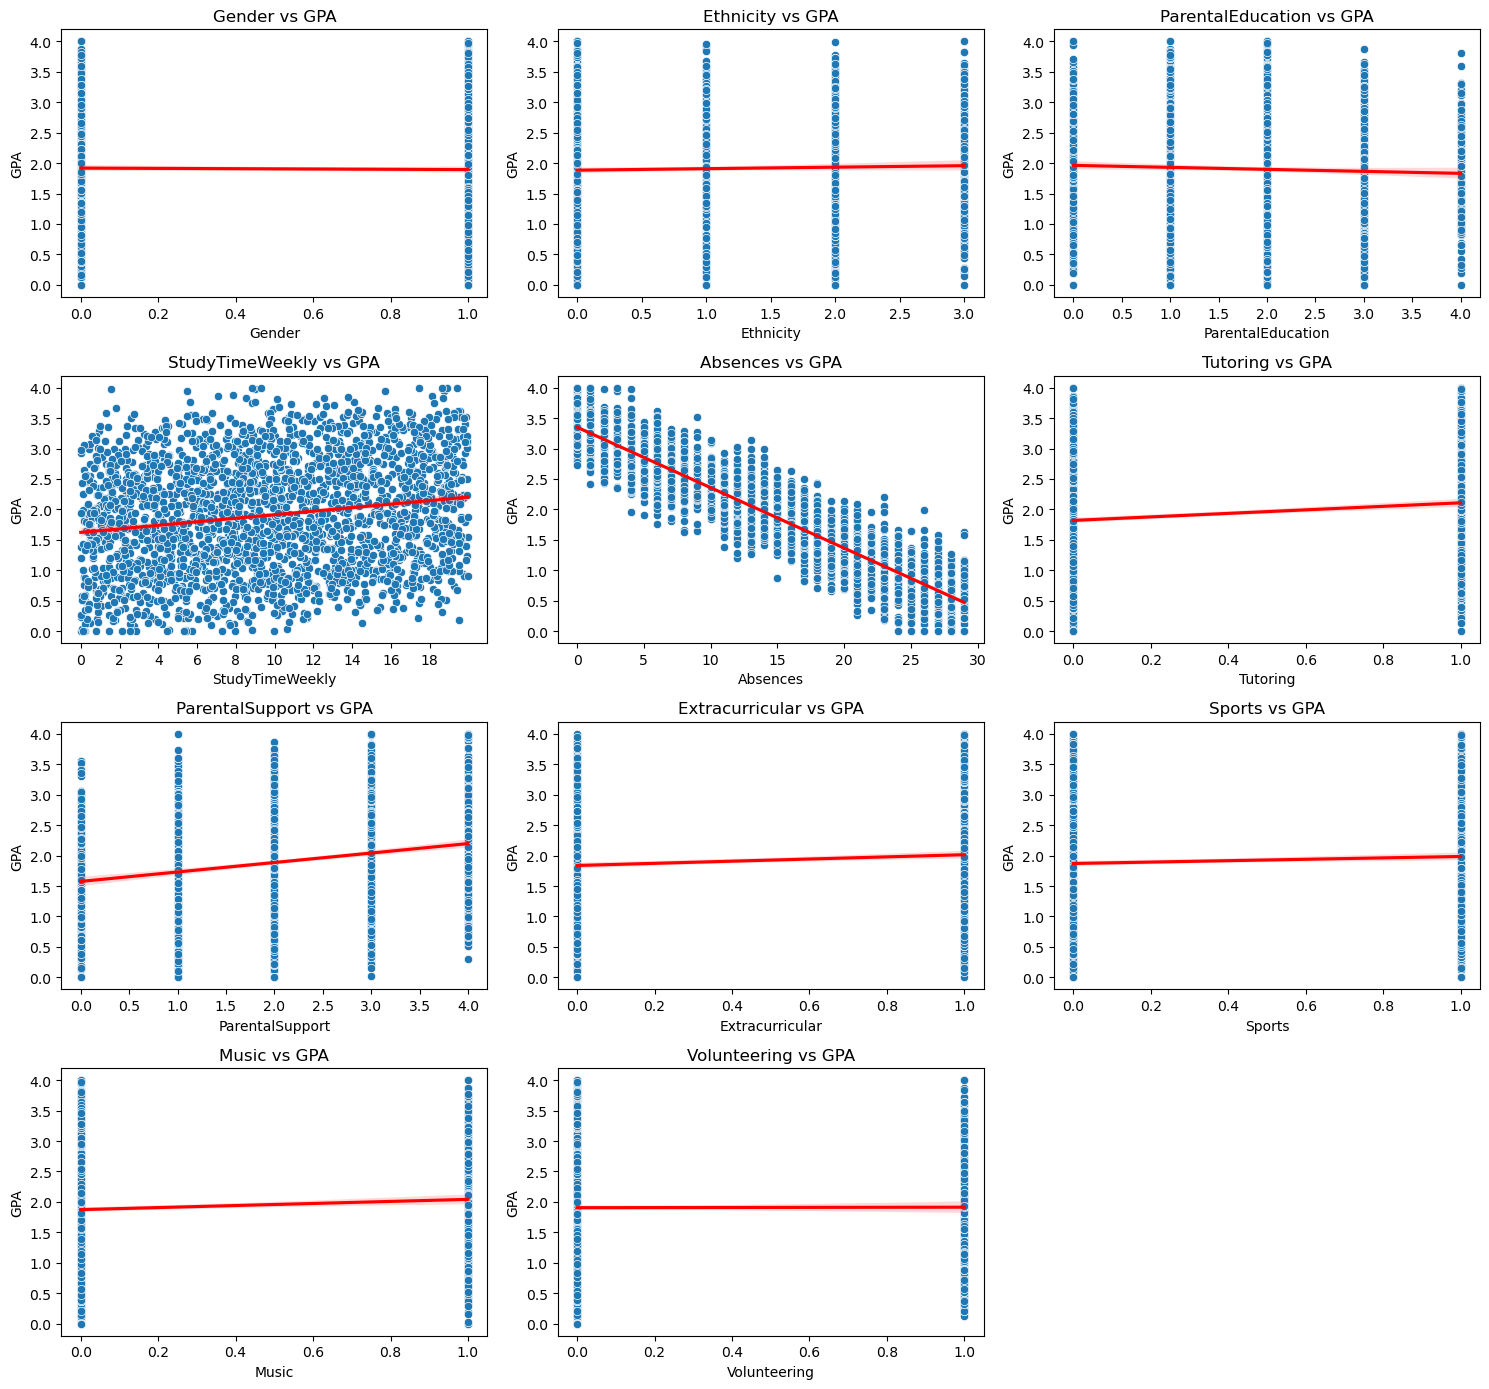

In [26]:
plt.figure(figsize=(15, 14))

for i, col in enumerate(df.columns[1:12]):  # Skipping StudentID and ending before GPA
    plt.subplot(4, 3, i + 1)
    
    sns.scatterplot(data=df, x=col, y='GPA')
    sns.regplot(data=df, x=col, y='GPA', scatter=False, color='red')
    
    plt.title(f'{col} vs GPA')
    plt.ylabel('GPA')
    plt.xlabel(col)
    
    # Tick control
    if df[col].dtype in [int, float]:
        if df[col].max() > 10:
            interval = 2
            plt.xticks(ticks=range(int(df[col].min()), int(df[col].max()) + 1, interval), labels=[f"{i}" for i in range(int(df[col].min()), int(df[col].max()) + 1, interval)])
        else:
            interval = 1
            plt.xticks(ticks=range(int(df[col].min()), int(df[col].max()) + 1, interval), labels=[f"{i}" for i in range(int(df[col].min()), int(df[col].max()) + 1, interval)])
    
    plt.yticks(ticks=np.arange(0, 4.5, 0.5))

plt.tight_layout()
plt.show()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,1
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,1
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,4
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,4


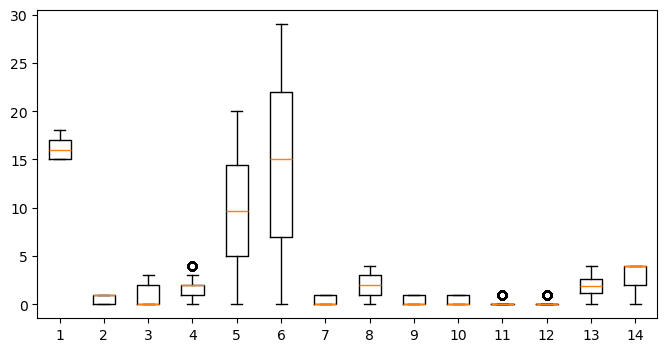

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.boxplot(df)
df

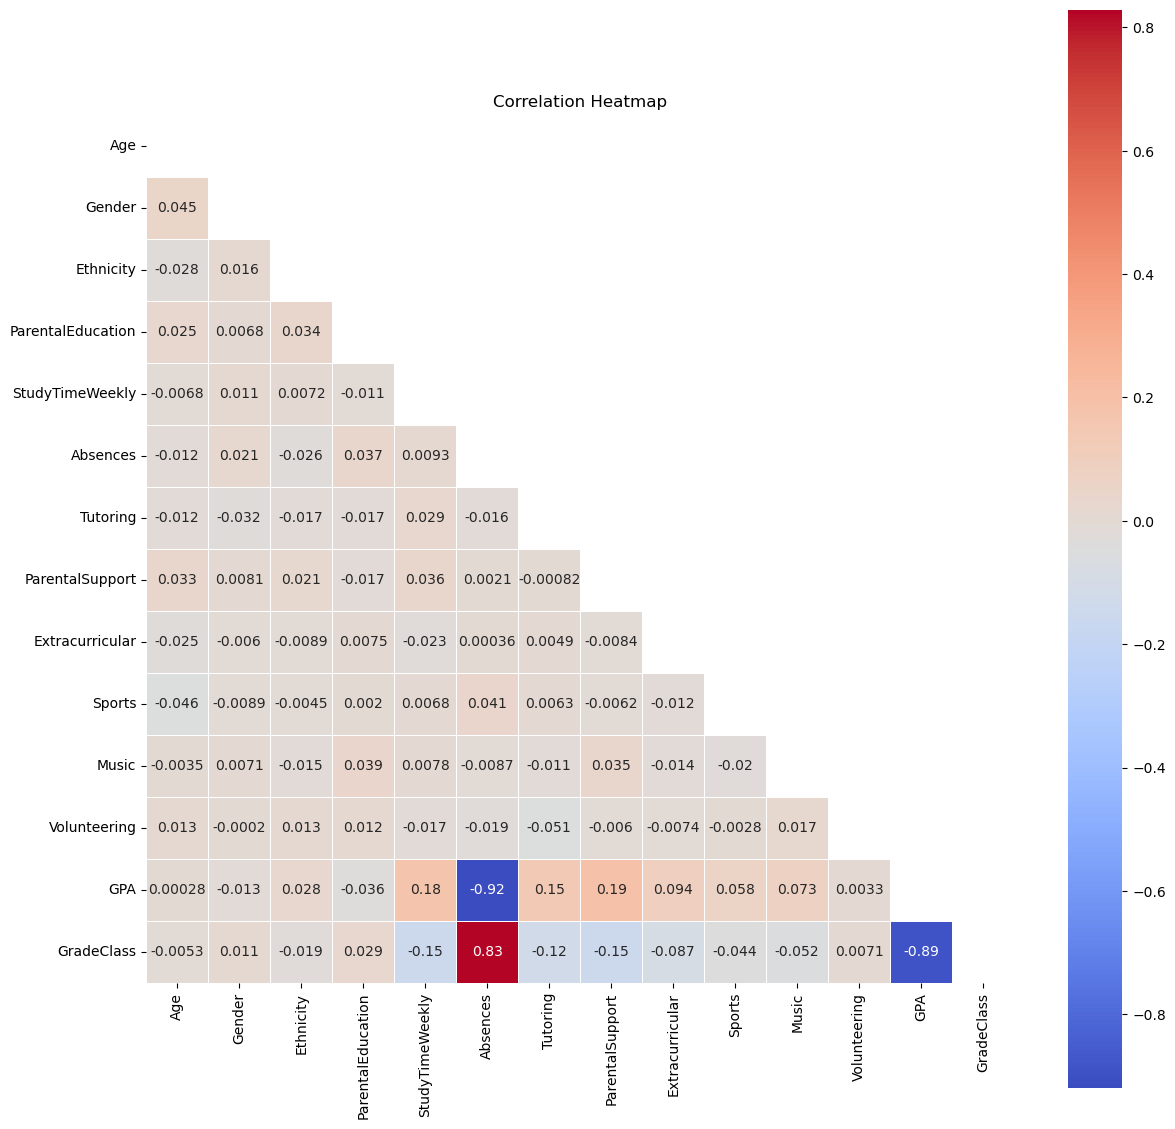

In [28]:
plt.figure(figsize=(14, 14))
sns.heatmap(
    df.corr(numeric_only=True), 
    annot=True, 
    mask=np.triu(np.ones_like(df.corr(), dtype=bool)), 
    cmap='coolwarm', 
    linewidths=0.5,
    square=True
)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


## Missing value and Outlier Treatment 

In [30]:
## Handle missing values and outliers from here
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("No missing values in dataset.")

No missing values in dataset.


In [31]:
from scipy.stats import zscore

z_scores = df.copy()
for col in numerical:
    z_scores[col] = np.abs(zscore( df[col] ))

z_scoreCap = 3
num_outliers = (z_scores[numerical] > z_scoreCap).any(axis=1).sum()
df_outliers = df.copy()
df_outliers = df_outliers[(z_scores[numerical] > z_scoreCap).any(axis=1)]

if (num_outliers > 0 ):
    print(f"Number of outliers (Z-score > {z_scoreCap}): {num_outliers}")
    display(df_outliers[numerical].head(num_outliers), HTML)
else:
    print("No outliers in dataset.")

No outliers in dataset.


In [32]:
## Removing unncessary columns 


## Feature Engineering 

In [33]:
## Now that we've trained the model without engineering the features we're going to do some feature engineering and smoothing to see how the model performs 
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
df.head()



,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


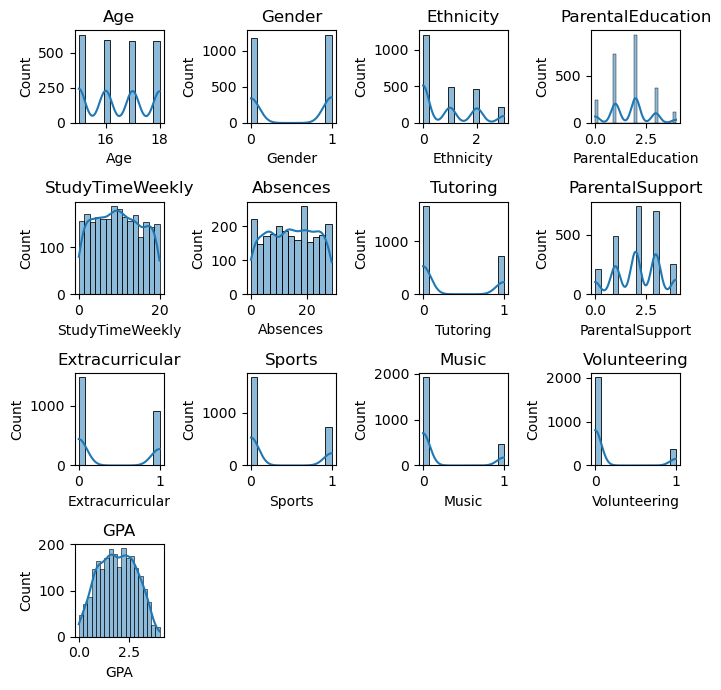

In [34]:
numeric_data = df.select_dtypes(include=['number']).columns.to_list()
numeric_features = [col for col in numeric_data if col != 'GradeClass']
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

plt.figure(figsize=(7, 7))
for i, col in enumerate(df[numeric_features].columns):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

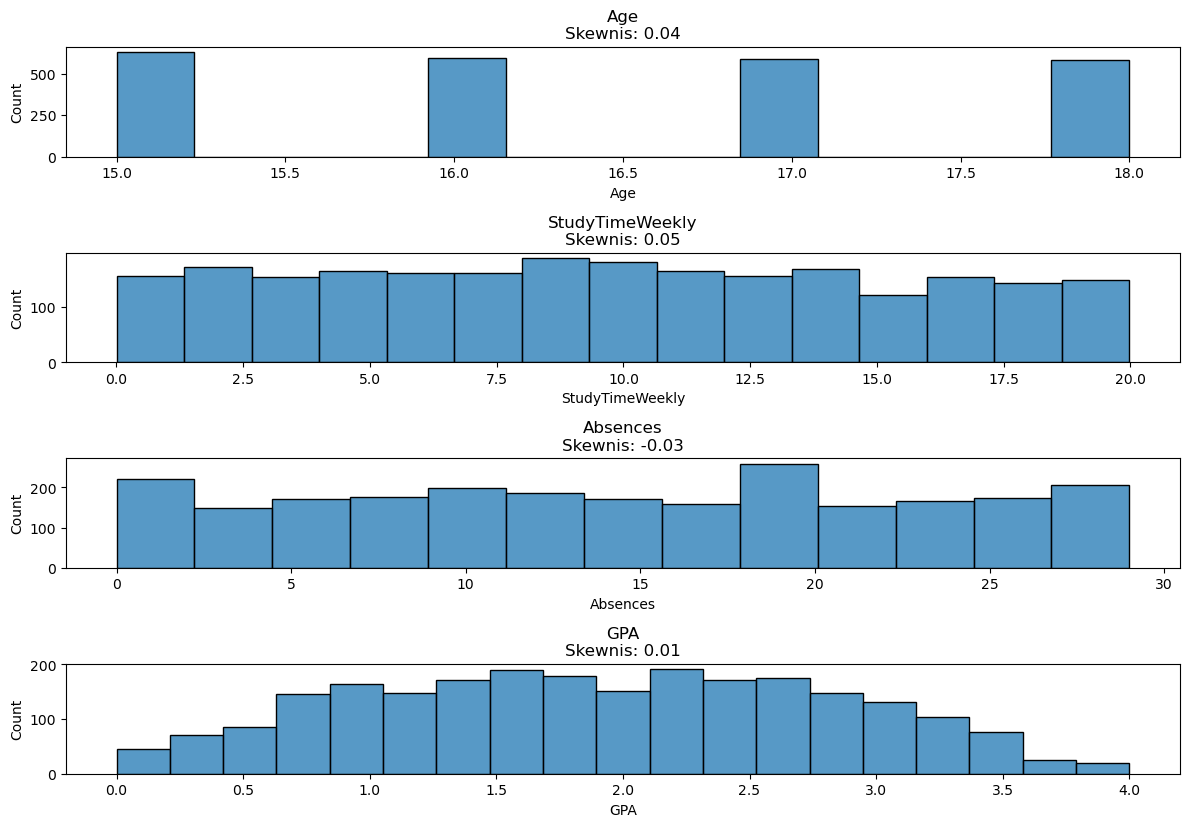

No numerical feactures are skewd


In [35]:

skewd = []
plt.figure(figsize=(12,10))
for i, col in enumerate(df[numerical]):
    plt.subplot(5, 1, i+1)
    sns.histplot(data=df[col])
    skewnes = df[col].skew()
    if (skewnes > 1):
        skewd.append(col)
    plt.title(f"{col}\nSkewnis: {round(skewnes, 2)}")
plt.tight_layout()
plt.show()

if (len(skewd) > 0):
    print(skewd)
else:
    print("No numerical feactures are skewd")

In [36]:
## Dropping the GPA Because it has a 1:1 relationship with the target column
df = df.drop(columns='GPA')

In [37]:
numeric_features =['Age',
 'StudyTimeWeekly',
 'Absences',
 ]

In [38]:
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features]) 
scaler_path = os.path.join('../Artifacts','scaler.pkl')
df.head(20)


,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,0.472919,1,0,2,1.780336,-0.890822,1,2,0,0,1,0,2
1,1.362944,0,0,1,0.997376,-1.717694,0,1,0,0,0,0,1
2,-1.307132,0,2,3,-0.984045,1.353542,0,2,0,0,0,0,4
3,0.472919,1,0,3,0.045445,-0.063951,0,3,1,0,0,0,3
4,0.472919,1,0,2,-0.902311,0.290422,1,3,0,0,0,0,4
5,1.362944,0,0,1,-0.279704,-1.717694,0,1,1,0,0,0,1
6,-1.307132,0,1,1,1.031513,-0.536449,0,3,0,1,0,0,2
7,-1.307132,1,1,4,1.000161,0.881045,1,1,1,0,0,0,4
8,0.472919,0,0,0,-0.921861,-1.599569,0,2,0,1,0,1,2
9,-0.417106,1,0,1,1.534519,-1.717694,0,3,1,0,0,0,0


In [39]:
import joblib

ohe = OneHotEncoder(sparse_output=False, drop='first')
ordinal_encoder_Parent = OrdinalEncoder(categories=[[0,1,2,3,4]])
ordinal_encoder_ParentalSup = OrdinalEncoder(categories=[[0,1,2,3,4]])

ethnicity_encoded = ohe.fit_transform(df[['Ethnicity']])
ethnicity_df = pd.DataFrame(ethnicity_encoded, columns=[f'Ethnicity_{cat}' for cat in ohe.categories_[0][1:]]) ## this is nominal so we split up each category into their own binary columns
df = pd.concat([df, ethnicity_df], axis=1)
df.drop('Ethnicity', axis=1, inplace=True)

# Fit and transform 'ParentalEducation' using Ordinal Encoding
df['ParentalEducation'] = ordinal_encoder_Parent.fit_transform(df[['ParentalEducation']]) ## these are ordinal so we dont split them up because their order matters 

# Fit and transform 'ParentalSupport' using Ordinal Encoding
df['ParentalSupport'] = ordinal_encoder_ParentalSup.fit_transform(df[['ParentalSupport']])
df.head()

ohe_ethnicity_path = os.path.join('../Artifacts', 'ohe_ethnicity.pkl')
ordinal_parent_edu_path = os.path.join('../Artifacts', 'ordinal_parent_edu.pkl')
ordinal_parent_sup_path = os.path.join('../Artifacts', 'ordinal_parent_sup.pkl')

joblib.dump(scaler,scaler_path)
joblib.dump(ohe,ohe_ethnicity_path)
joblib.dump(ordinal_encoder_Parent,ordinal_parent_edu_path)
joblib.dump(ordinal_encoder_ParentalSup,ordinal_parent_sup_path)

['../Artifacts\\ordinal_parent_sup.pkl']

## Model Building: Part 1 Model Building: Part 1 (Apply baseline machine learning classification algorithms:
Logistic Regression, Random Forest, and XGBoost with step 8)


In [55]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,ridge_regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
## Now that we've transformed the Data lets fit the model again. 
def train_models(X_train, X_test, Y_train, Y_test,models=None,):
    '''
    This function will take in multiple models to train them at base to see which method gives the highest score.
    '''
    model_info = {}

    for model in models:
        model.fit(X_train,Y_train)
        y_preds = model.predict(X_test)
        model_score = accuracy_score(Y_test,y_preds)
        model_info[model.__class__.__name__] = model_score

    return model_info


X_transformed = df.drop(['GradeClass'],axis=1)
Y_transformed = df['GradeClass']

X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y_transformed, test_size=0.2, random_state=0)

models = [RandomForestClassifier(random_state=42),KNeighborsClassifier(n_neighbors=5),LogisticRegression(random_state=42,max_iter=100),GradientBoostingClassifier(random_state=42),SVC(random_state=42)] ## were picked 

model_info = train_models(X_train, X_test, Y_train, Y_test,models)
print(model_info)


c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'RandomForestClassifier': 0.7494780793319415, 'KNeighborsClassifier': 0.6325678496868476, 'LogisticRegression': 0.8079331941544885, 'GradientBoostingClassifier': 0.7640918580375783, 'SVC': 0.7724425887265136}


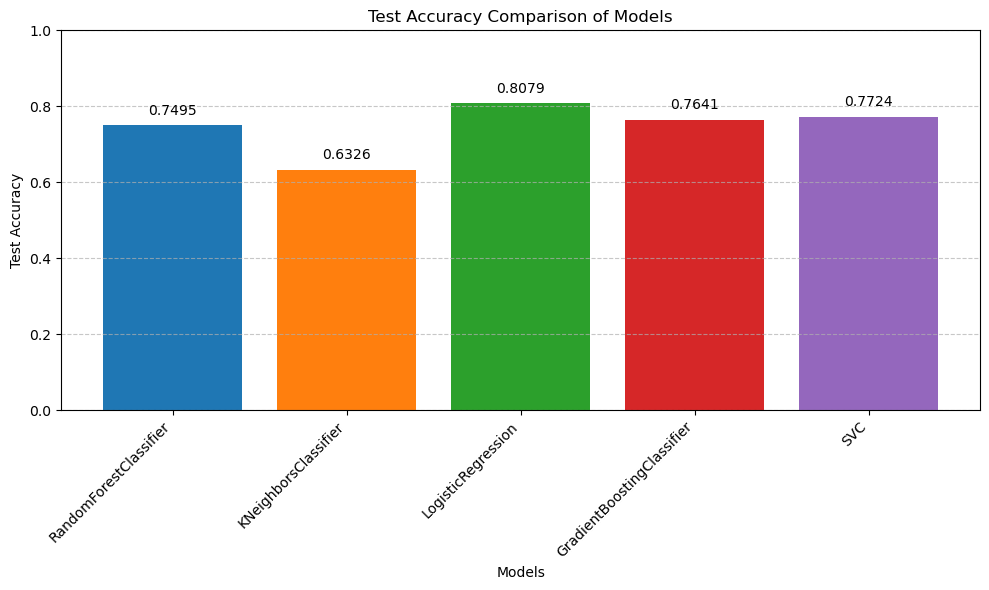

In [59]:
models = list(model_info.keys())
test_accuracies = list(model_info.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison of Models')
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
for i, v in enumerate(test_accuracies):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', va='bottom')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.subplots_adjust(bottom=0.2)  # Increase bottom margin for x-axis labels
plt.tight_layout()

# Save the plot to a file
plt.savefig('test_accuracy_comparison_dynamic.png')

## Evlauation, cross comparison and metrics

In [57]:
lg = LogisticRegression(random_state=42)
lg.fit(X_train,Y_train) 
cv_scores = cross_val_score(lg,X_transformed,Y_transformed,cv=5,scoring='accuracy')
print(f"Cross validation Accuracy for Logistic regression : {cv_scores.mean()}")

svc = SVC(random_state=42)
svc.fit(X_train,Y_train)
cv_scores = cross_val_score(svc,X_transformed,Y_transformed,cv=5)
print(f"Cross validation Accuracy for SVC Classifier : {cv_scores.mean()}")

c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross validation Accuracy for Logistic regression : 0.8139612686821394
Cross validation Accuracy for SVC Classifier : 0.7964186196836156


In [42]:
# feature_importance_lg = pd.DataFrame({
#     'features':X_transformed.columns,
#     'Importance':lg.
#     })

# feature_importance_lg.sort_values(by='Importance',ascending=False)
# feature_importance_lg

In [43]:
# plt.figure(figsize=(8, 6))
# feature_importance_lg.plot.bar()
# plt.title('Logistic Regression Feature Importance')
# plt.show()

In [44]:
# feature_importance_svc = pd.DataFrame({
#     'features':X_transformed.columns,
#     'Importance':svc.feature_importances_
#     })

# feature_importance_svc.sort_values(by='Importance',ascending=False)
# feature_importance_svc

In [45]:
# plt.figure(figsize=(8, 6))
# feature_importance_svc.plot.bar()
# plt.title('Gradient Boosting Featuer Importance')
# plt.show()

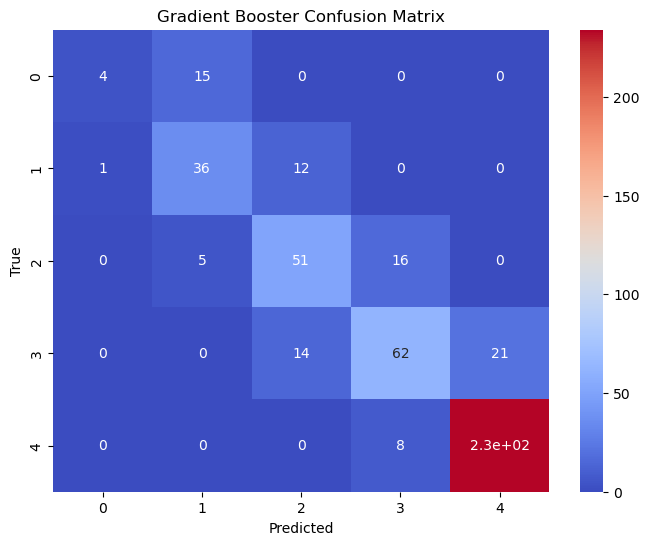

[3 3 4 4 1 1 4 2 3 4 1 4 4 2 4 4 1 4 4 3 1 3 4 4 4 2 3 3 4 2 2 4 3 2 4 4 4
 3 2 4 2 4 4 4 4 4 0 2 3 4 1 1 4 2 1 3 4 4 3 4 4 3 2 4 3 4 4 4 3 2 2 4 4 3
 4 4 3 4 4 4 3 4 1 4 3 4 4 4 4 4 2 4 2 2 4 1 4 1 3 3 1 4 4 4 4 1 4 4 4 2 4
 1 4 3 4 1 2 4 4 1 2 1 2 2 4 1 4 1 4 4 4 4 2 1 3 2 4 4 4 4 3 4 2 4 2 4 4 3
 4 2 4 4 4 4 4 1 4 4 3 4 2 4 3 4 1 1 4 4 4 2 1 2 3 2 3 3 2 1 4 4 4 4 1 3 1
 3 4 4 4 4 4 4 4 3 4 3 1 3 4 3 4 3 4 4 4 2 4 4 2 4 4 4 4 4 4 4 4 3 3 4 4 2
 4 2 4 4 2 4 3 2 4 2 3 3 4 2 4 2 3 4 2 2 2 2 4 3 3 3 4 1 4 4 2 3 3 2 3 4 4
 4 2 4 4 4 2 4 2 4 4 2 0 4 4 2 4 4 1 4 2 4 1 4 2 4 0 4 2 3 2 1 3 3 4 4 2 1
 4 4 1 4 4 4 4 4 1 1 4 4 1 2 3 3 4 3 3 4 4 4 4 4 3 4 3 4 4 4 4 4 4 4 3 1 1
 3 1 4 2 4 4 1 1 4 3 1 4 2 4 4 4 4 4 4 4 4 1 1 4 1 4 4 3 4 3 4 4 2 4 4 4 4
 4 2 4 4 4 4 4 3 4 1 1 3 3 4 4 4 4 4 3 4 3 4 3 3 4 2 1 2 4 4 4 2 4 1 4 3 3
 4 4 2 2 4 4 1 4 3 2 4 0 1 3 4 3 2 3 2 4 1 2 4 4 4 3 3 4 3 2 2 1 4 4 3 3 4
 3 4 4 4 1 4 4 4 4 4 2 4 4 2 4 4 4 4 4 2 0 1 4 4 2 3 4 3 4 4 4 4 2 3 3]


In [46]:
Y_pred = lg.predict(X_test)
confusion_matrix_rf = confusion_matrix(Y_test,Y_pred)
fig,ax = plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix_rf,annot=True,cmap='coolwarm')
plt.title('Gradient Booster Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(Y_pred)

In [47]:
classification_report_lg = classification_report(Y_test,Y_pred)
print(f"classification_report :{classification_report_lg}")

classification_report :              precision    recall  f1-score   support

           0       0.80      0.21      0.33        19
           1       0.64      0.73      0.69        49
           2       0.66      0.71      0.68        72
           3       0.72      0.64      0.68        97
           4       0.92      0.97      0.94       242

    accuracy                           0.81       479
   macro avg       0.75      0.65      0.66       479
weighted avg       0.81      0.81      0.80       479



In [58]:
from sklearn.model_selection import GridSearchCV


## We need to give it a dic of the params to use 
params_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': np.logspace(-4, 4, 5), # Inverse of regularization strength (small C = strong regularization)
    'solver': ['liblinear', 'saga'], # Solvers that support both l1 and l2 penalties
    'class_weight': [None, 'balanced']
}
## this setups the grid search and runs it producing the best paramaters for our model
grid_search = GridSearchCV(LogisticRegression(random_state=42),param_grid=params_grid_lr,cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train)
print(f"The Best Parameteres were :{grid_search.best_params_} ")
print(f"The best cv score was : {(grid_search.best_score_)}")

best_random_forest = grid_search.best_estimator_
joblib.dump(best_random_forest,'../Artifacts/Logisticregression.pkl')

c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter 

The Best Parameteres were :{'C': 100.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'} 
The best cv score was : 0.8201796235287684


c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\thape\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['../Artifacts/Logisticregression.pkl']

## Model building: part 2 (Apply Deep Learning classification algorithm with step 8)

In [49]:
## To create a deep learning problem There are a few steps we have to do to the data first 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

def preprocessing_data_for_deep_learning(dataframe):
    '''
    A method for preprocessinf data that will be used in our deep learning model.
    It takes in a dataframe  that looks identical to our sample data 'Student peformance' and processes it.
    1. Feature scaling 
    2. One hot encoding categorical variables 
    3. Targate variable encoding
    '''

    df = dataframe
    features = ['Age', 'Gender', 'Ethnicity_1','Ethnicity_2','Ethnicity_3', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering']
    X = df[features]
    Y = df['GradeClass']
    

    cat_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Tutoring']
    num_features = ['Age', 'StudyTimeWeekly', 'Absences']


    y_encoded = to_categorical(Y,num_classes = 5)


    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = preprocessing_data_for_deep_learning(df)




In [50]:
from tensorflow.keras.optimizers import AdamW
optimizer = AdamW(learning_rate=0.001, weight_decay=0.01)
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3), # Add a dropout layer after the first dense layer (e.g., 30% dropout)
    layers.Dense(120, activation='relu'),
    layers.Dropout(0.3), # Add a dropout layer after the second dense layer
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Training  the Model
history = model.fit(X_train, y_train,
                    epochs=750,
                    batch_size=256,
                    validation_split=0.2,
                    callbacks=[keras.callbacks.EarlyStopping(patience=60)])

# 7. Evaluating  Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/750


c:\Users\thape\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3319 - loss: 1.5209 - val_accuracy: 0.5405 - val_loss: 1.2506
Epoch 2/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5229 - loss: 1.2668 - val_accuracy: 0.5431 - val_loss: 1.0981
Epoch 3/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5511 - loss: 1.1075 - val_accuracy: 0.6057 - val_loss: 0.9773
Epoch 4/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6297 - loss: 0.9512 - val_accuracy: 0.6736 - val_loss: 0.8655
Epoch 5/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6549 - loss: 0.8520 - val_accuracy: 0.6971 - val_loss: 0.7923
Epoch 6/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6777 - loss: 0.7771 - val_accuracy: 0.7206 - val_loss: 0.7386
Epoch 7/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6934 - loss: 0.7575 - val_accuracy: 0.7206 - val_loss: 0.6975
Epoch 8/750
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7155 - loss: 0.6961 - val_accuracy: 0.7389 - val_loss: 0.6658
Epoc

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
              precision    recall  f1-score   support

           0       0.60      0.30      0.40        10
           1       0.75      0.64      0.69        59
           2       0.64      0.72      0.68        79
           3       0.58      0.71      0.64        79
           4       0.96      0.90      0.93       252

    accuracy                           0.80       479
   macro avg       0.70      0.66      0.67       479
weighted avg       0.81      0.80      0.80       479



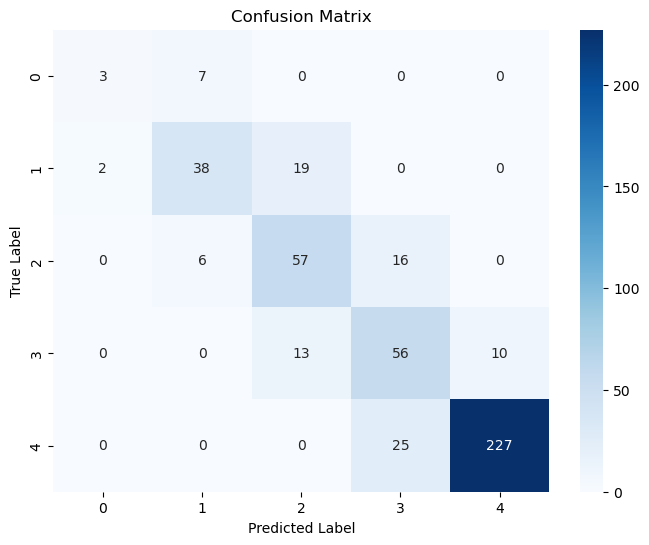

In [51]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_true_classes, y_pred_classes))
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

model.save(filepath='../Artifacts/deeplearningBright.h5')

## Conclusion 
#### what the data showed us 

After thoroughly going through the data given to us by bright Academy, we were able to learn some feky factors. 
- Students with higher study hours, greater parental support, and participation in tutoring tend to have higher GPAs, supporting hypotheses 1, 2, and 4.
- Higher Absences, was shown to be the greatest contributor to to a students GPA, the more Absences a child had the lower their grade class mark, supporting hypothesis 3.
- The rest of the features gave mixed interprations or showed little correlation to the grade class, with some students benefiting and others not. This might suggest a need for balance or further investigation into individual students.

#### best model 
During the course model traing we trained various models, and logistice regression came out on top with an average score of 82%, after testing various hyperparameter settings. 


#### suggestions and recommendations  moving forward
1. For early intervention try identifiying students who seem to have increasing amount of absences throughout a school term or semestier as this is a leading indication of a lower grade class score 
2. Promote parental involvment in the students lives as this has shown to be another factor that contributes to a higher grade class score 
3. Advise students to balance their extra curricular activities with their school without over prioritizing one over the other.
4. For further information consider adding additional student information, for a better more robust model.